In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sympy import *
from sympy.stats import *
import math
import seaborn as sns

In [2]:
parameters = pd.read_csv('parameters.csv')
mean_parameters = parameters.iloc[0::2]
mean_parameters=mean_parameters.reset_index().drop('index',axis=1)
mean_parameters

,Rv,distribution,parameters,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6,Zone 7
0,err,N,mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
1,su,N,mean,46.857143,56.239161,44.597203,51.547153,37.073526,49.830569,54.00969
2,a,N,mean,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000
3,gamma,N,mean,18.400000,18.340000,17.300000,18.780000,18.720000,19.640000,16.88000
4,R,N,mean,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000
5,eta,N,mean,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000
6,q,N,mean,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000


In [3]:
std_parameters= parameters.iloc[1::2].reset_index().drop('index',axis=1)
std_parameters

,Rv,distribution,parameters,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6,Zone 7
0,err,N,std,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,su,N,std,8.468764,7.557970,9.732100,5.190861,6.058854,9.153118,11.091138
2,a,N,std,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
3,gamma,N,std,1.019804,2.039117,2.732215,1.976613,1.395349,2.169793,2.591718
4,R,N,std,1.600000,1.600000,1.600000,1.600000,1.600000,1.600000,1.600000
5,eta,N,std,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
6,q,N,std,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
zones = std_parameters.drop(['Rv','distribution','parameters'],axis=1).columns
zones=list(zones)

In [5]:
pf=np.array([])
simulation=np.array([])

probability of faliure for Zone 1 is 4.22e-06 with CoV 0.5237250556716995
probability of faliure for Zone 2 is 0.0 with CoV 0.4982641160864155
probability of faliure for Zone 3 is 7.842e-05 with CoV 0.5576613823299275
probability of faliure for Zone 4 is 0.0 with CoV 0.49385315937684016
probability of faliure for Zone 5 is 6.28e-06 with CoV 0.5396366189408394
probability of faliure for Zone 6 is 5.78e-06 with CoV 0.5384028717261693
probability of faliure for Zone 7 is 1.377e-05 with CoV 0.5327786714399412


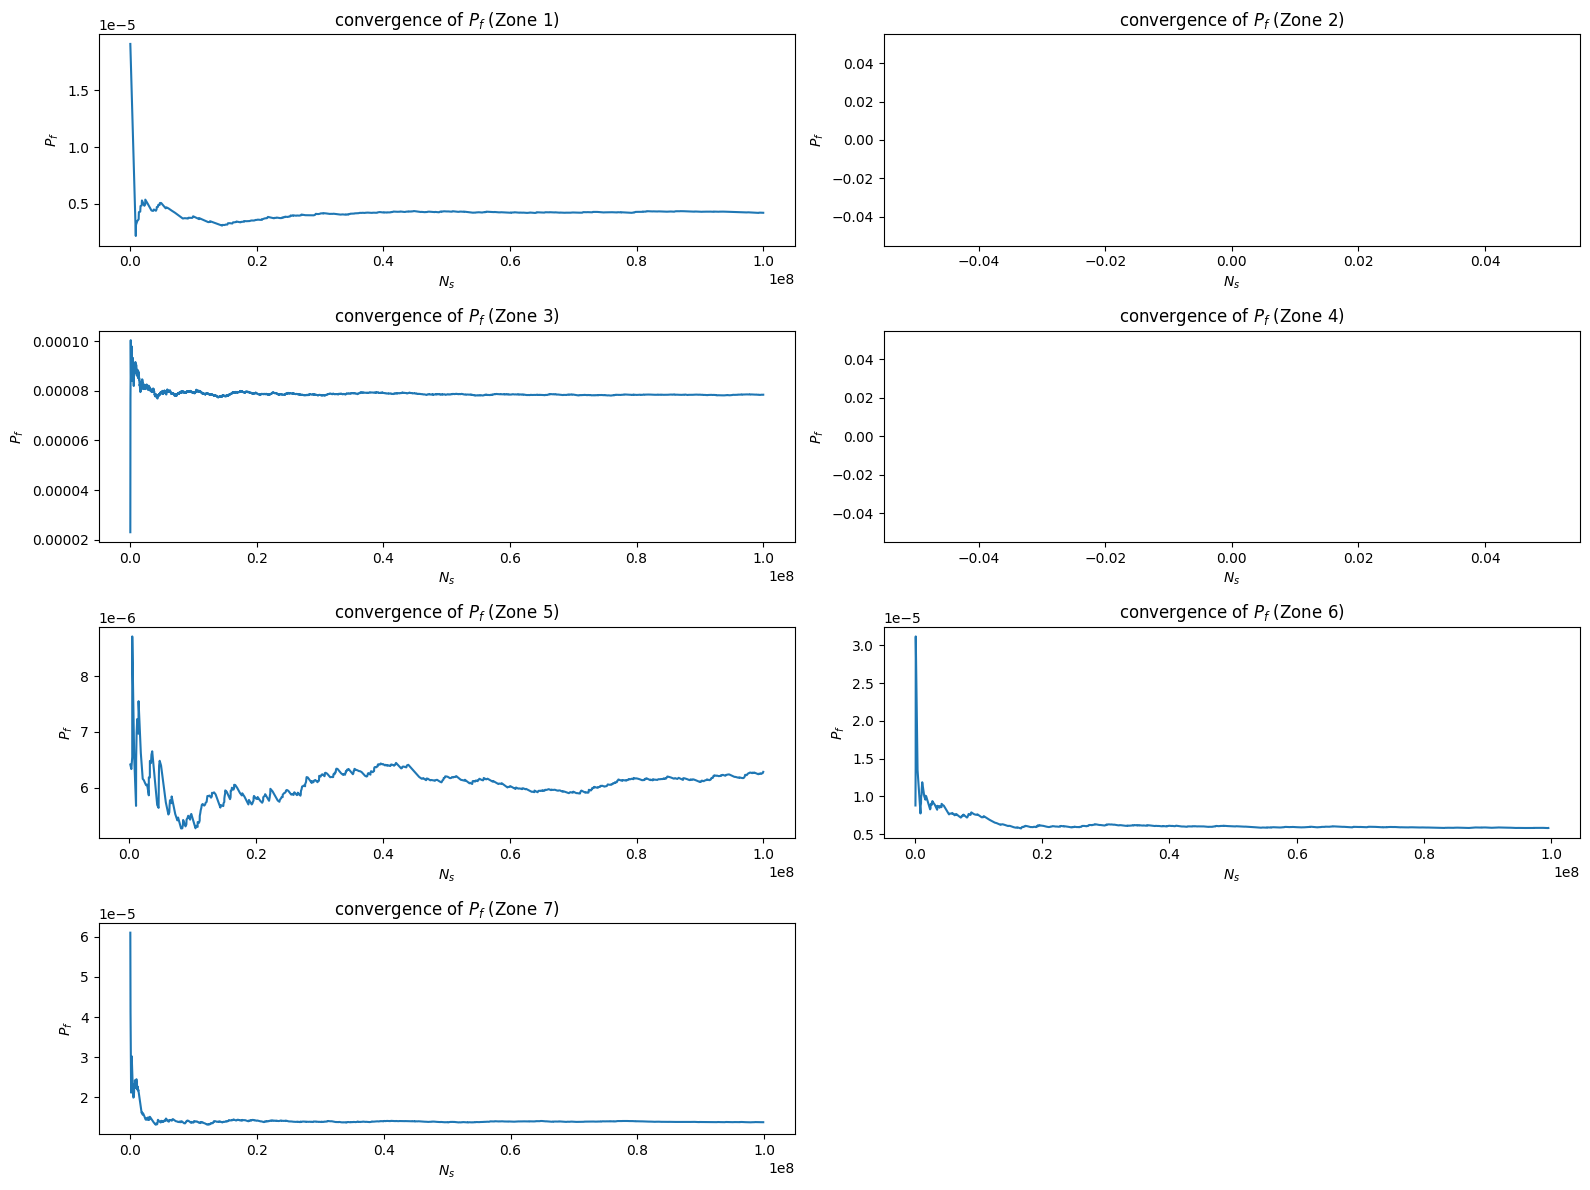

In [6]:
plt.figure(figsize=(16,12))
for zone in zones:
  z1=mean_parameters.loc[:,zone]
  z2=std_parameters.loc[:,zone]
  plt.subplot(4,2, zones.index(zone) + 1)
  x=10**8
  err=np.random.normal(z1[0],z2[0],x)
  su=np.random.normal(z1[1],z2[1],x)
  a=np.random.normal(np.radians(z1[2]),np.radians(z2[2]),x)
  gamma=np.random.normal(z1[3],z2[3],x)
  R=np.random.normal(z1[4],z2[4],x)
  n=np.random.normal(z1[5],z2[5],x)
  q = np.random.normal(z1[6],z2[6],x)

  mask_negative = np.any(np.vstack((err < 0, su < 0, a < 0, gamma < 0, R < 0, n < 0, q < 0)), axis=0)


  err=err[~mask_negative]
  su=su[~mask_negative]
  a=a[~mask_negative]
  gamma=gamma[~mask_negative]
  R=R[~mask_negative]
  n=n[~mask_negative]
  q=q[~mask_negative]

  g_x=(err*su*a)/(1/4*gamma*R*(a-np.sin(a))*np.sin(a)+n*q*np.sin(a))-1
  simulation=np.arange(1,su.shape[0]+1)
  np.cumsum(np.where(g_x[g_x<=0]<0,1,0))/simulation[g_x<=0]
  plt.plot(simulation[g_x<=0],np.cumsum(np.where(g_x[g_x<=0]<0,1,0))/simulation[g_x<=0])
  plt.title(f"convergence of $P_f$ ({zone})")
  plt.xlabel(r'$N_s$')
  plt.ylabel(r'$P_f$')
  print(f"probability of faliure for {zone} is {np.size(g_x[g_x<=0])/x} with CoV {np.std(g_x)/np.mean(g_x)}")

plt.tight_layout()
plt.show()

In [7]:
# plt.figure(figsize=(16,12))
# for zone in zones:
#   z1=mean_parameters.loc[:,zone]
#   z2=std_parameters.loc[:,zone]
#   plt.subplot(4,2, zones.index(zone) + 1)
#   x=10**7
#   err=np.random.normal(z1[0],z2[0],x)
#   su=np.random.normal(z1[1],z2[1],x)
#   a=np.random.normal(np.radians(z1[2]),np.radians(z2[2]),x)
#   gamma=np.random.normal(z1[3],z2[3],x)
#   R=np.random.normal(z1[4],z2[4],x)
#   n=np.random.normal(z1[5],z2[5],x)
#   q = np.random.normal(z1[6],z2[6],x)
#   Fs=(err*su*a)/(1/4*gamma*R*(a-np.sin(a))*np.sin(a)+n*q*np.sin(a))
#   simulation=np.arange(1,10**7+1)
#   plt.plot(simulation,np.cumsum(Fs)/simulation)
#   plt.title(f"convergence of $F_s$ mean ({zone})")
#   plt.xlabel(r'$N_s$')
#   plt.ylabel(r'$\mu_{F_s}$')

# plt.tight_layout()
# plt.show()

In [8]:
# plt.figure(figsize=(16,12))
# for zone in zones:
#   z1=mean_parameters.loc[:,zone]
#   z2=std_parameters.loc[:,zone]
#   plt.subplot(4,2, zones.index(zone) + 1)
#   x=10**5
#   err=np.random.normal(z1[0],z2[0],x)
#   su=np.random.normal(z1[1],z2[1],x)
#   a=np.random.normal(np.radians(z1[2]),np.radians(z2[2]),x)
#   gamma=np.random.normal(z1[3],z2[3],x)
#   R=np.random.normal(z1[4],z2[4],x)
#   n=np.random.normal(z1[5],z2[5],x)
#   q = np.random.normal(z1[6],z2[6],x)
#   Fs=(err*su*a)/(1/4*gamma*R*(a-np.sin(a))*np.sin(a)+n*q*np.sin(a))
#   simulation=np.arange(1,x+1)
#   mean = np.cumsum(Fs)/simulation
#   std=np.arange(x,dtype=float)
#   for i in range(x):
#     std[i] = np.sqrt((np.sum((Fs[0:i]-mean[i])**2))/(i+1))
#   plt.plot(simulation,std)
#   plt.title(f"convergence of $F_s$ Standard deviation ({zone})")
#   plt.xlabel(r'$N_s$')
#   plt.ylabel(r'$\sigma_{F_s}$')

# plt.tight_layout()
# plt.show()

In [9]:
# plt.figure(figsize=(16,12))
# for zone in zones:
#   z1=mean_parameters.loc[:,zone]
#   z2=std_parameters.loc[:,zone]
#   plt.subplot(4,2, zones.index(zone) + 1)
#   x=10**5
#   err=np.random.normal(z1[0],z2[0],x)
#   su=np.random.normal(z1[1],z2[1],x)
#   a=np.random.normal(np.radians(z1[2]),np.radians(z2[2]),x)
#   gamma=np.random.normal(z1[3],z2[3],x)
#   R=np.random.normal(z1[4],z2[4],x)
#   n=np.random.normal(z1[5],z2[5],x)
#   q = np.random.normal(z1[6],z2[6],x)
#   Fs=(err*su*a)/(1/4*gamma*R*(a-np.sin(a))*np.sin(a)+n*q*np.sin(a))
#   plt.hist(Fs, bins=range(round(min(Fs)), round(max(Fs)) + 1), color = 'white', edgecolor='black', density=True)
#   sns.kdeplot(Fs, color='blue', linestyle='dashed', linewidth=2)
#   plt.xlabel('Value')
#   plt.ylabel('Relative Frequency')
#   plt.title(f'Histogram with Relative Frequency of $F_s$ {zone}')

# plt.tight_layout()
# plt.show()